In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data = pd.read_csv("temperatures.csv")

In [3]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [5]:
data.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [6]:
data.isnull().sum().sum()

0

In [7]:
#finding correlation between the variables
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [8]:
data.corr()["ANNUAL"].sort_values(ascending=False)

ANNUAL     1.000000
OCT-DEC    0.897046
MAR-MAY    0.853277
JAN-FEB    0.849828
DEC        0.843660
NOV        0.812868
JUN-SEP    0.810786
YEAR       0.801129
FEB        0.792541
APR        0.770596
OCT        0.768170
AUG        0.755384
JAN        0.749880
SEP        0.730756
MAR        0.689205
MAY        0.609015
JUL        0.588454
JUN        0.520189
Name: ANNUAL, dtype: float64

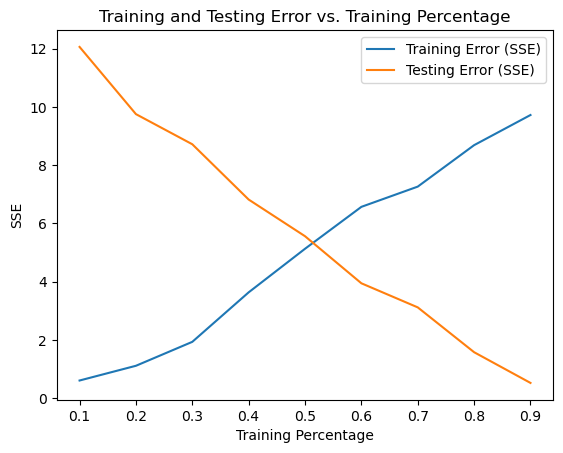

In [9]:
y = data["OCT-DEC"]
x = data[["ANNUAL"]]

training_percentages = []
for i in range(1, 10):
    percentage = i / 10.0 
    training_percentages.append(percentage)

training_errors = []
testing_errors = []
for percentage in training_percentages:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1 - percentage, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    training_sse = np.sum((y_train - y_train_pred) ** 2)
    testing_sse = np.sum((y_test - y_test_pred) ** 2)
    training_errors.append(training_sse)
    testing_errors.append(testing_sse)

plt.plot(training_percentages, training_errors, label="Training Error (SSE)")
plt.plot(training_percentages, testing_errors, label="Testing Error (SSE)")
plt.xlabel("Training Percentage")
plt.ylabel("SSE")
plt.legend()
plt.title("Training and Testing Error vs. Training Percentage")
plt.show()


In [10]:
data.corr()["ANNUAL"].sort_values(ascending=False)

ANNUAL     1.000000
OCT-DEC    0.897046
MAR-MAY    0.853277
JAN-FEB    0.849828
DEC        0.843660
NOV        0.812868
JUN-SEP    0.810786
YEAR       0.801129
FEB        0.792541
APR        0.770596
OCT        0.768170
AUG        0.755384
JAN        0.749880
SEP        0.730756
MAR        0.689205
MAY        0.609015
JUL        0.588454
JUN        0.520189
Name: ANNUAL, dtype: float64

In [11]:
y1=data['OCT-DEC']
x1=data[['ANNUAL']]

In [12]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [13]:
model.fit(x1_train,y1_train)

LinearRegression()

In [14]:
predicted=model.predict(x1_test)
y1_train_predicted=model.predict(x1_train)
y1_test_predicted=model.predict(x1_test)

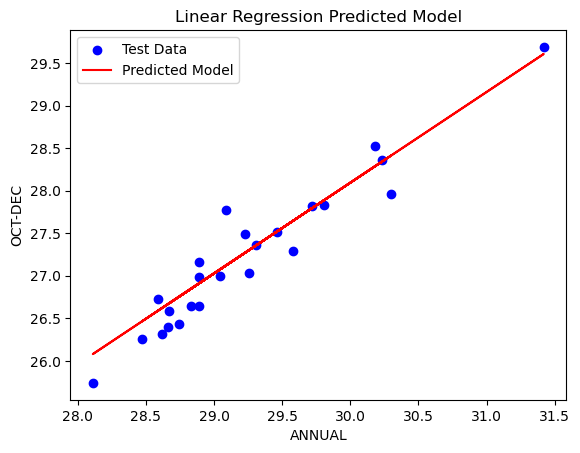

In [15]:
plt.scatter(x1_test, y1_test, color='blue', label='Test Data')
plt.plot(x1_test, y1_test_predicted, color='red', label='Predicted Model')
plt.ylabel('OCT-DEC')
plt.xlabel('ANNUAL')
plt.title('Linear Regression Predicted Model')
plt.legend()
plt.show()

In [16]:
x=data[['JUN']]
y=data['ANNUAL']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [18]:
model.fit(x_train,y_train)

LinearRegression()

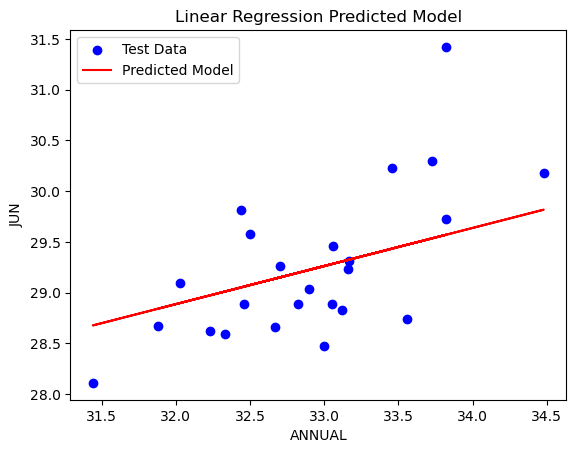

In [19]:
y_train_predicted=model.predict(x_train)
y_test_predicted=model.predict(x_test)
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test, y_test_predicted, color='red', label='Predicted Model')
plt.ylabel('JUN')
plt.xlabel('ANNUAL')
plt.title('Linear Regression Predicted Model')
plt.legend()
plt.show()

In [20]:
## Training evaluation
print(f"MSE:  {mean_squared_error(y_train_predicted,y_train)}")
print(f"MAE:  {mean_absolute_error(y_train_predicted,y_train)}")
print(f"R-Sqaure :  {r2_score(y_train_predicted,y_train)}")

MSE:  0.1949471246690816
MAE:  0.32831933122572016
R-Sqaure :  -2.7125180395715462


In [21]:
## Testing evaluation
print(f"MSE:  {mean_squared_error(y_test,predicted)}")
print(f"MAE:  {mean_absolute_error(y_test,predicted)}")
print(f"R-Sqaure :  {r2_score(y_test,predicted)}")

MSE:  3.827625396855481
MAE:  1.9558459978387972
R-Sqaure :  -6.262876417108747


In [22]:
## Training evaluation
print(f"MSE:  {mean_squared_error(y1_train_predicted,y1_train)}")
print(f"MAE:  {mean_absolute_error(y1_train_predicted,y1_train)}")
print(f"R-Sqaure :  {r2_score(y1_train_predicted,y1_train)}")

MSE:  0.09340332898434558
MAE:  0.24201992029544223
R-Sqaure :  0.667806132939432


In [23]:
## Testing evaluation
print(f"MSE:  {mean_squared_error(y1_test_predicted,y1_test)}")
print(f"MAE:  {mean_absolute_error(y1_test_predicted,y1_test)}")
print(f"R-Sqaure :  {r2_score(y1_test_predicted,y1_test)}")

MSE:  0.06571328479104192
MAE:  0.20448929986352468
R-Sqaure :  0.8902605079178999
